In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
cc = pd.read_csv('CC_GENERAL.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
cc.shape

(8950, 18)

In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
cc_null = 100 * (cc.isnull().sum()) / len(cc)
cc_null

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [7]:
cc = cc.dropna()
cc.shape

(8636, 18)

In [9]:
cc['CUST_ID'] = cc['CUST_ID'].astype(str)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
# Monetary

cc_m = cc.groupby('CUST_ID')['PAYMENTS'].sum()

cc_m = cc_m.reset_index()
cc_m.head()

,CUST_ID,PAYMENTS
0,C10001,201.802084
1,C10002,4103.032597
2,C10003,622.066742
3,C10005,678.334763
4,C10006,1400.057770


In [12]:
# Frequency

cc_f = cc.groupby('CUST_ID')['PURCHASES_FREQUENCY'].sum()

cc_f = cc_f.reset_index()
cc_f.head()

,CUST_ID,PURCHASES_FREQUENCY
0,C10001,0.166667
1,C10002,0.000000
2,C10003,1.000000
3,C10005,0.083333
4,C10006,0.666667


In [13]:
rfm = pd.merge(cc_m, cc_f, on='CUST_ID', how='inner')
rfm.head()

,CUST_ID,PAYMENTS,PURCHASES_FREQUENCY
0,C10001,201.802084,0.166667
1,C10002,4103.032597,0.000000
2,C10003,622.066742,1.000000
3,C10005,678.334763,0.083333
4,C10006,1400.057770,0.666667


KUNU RECENCY NAI

Text(0.5, 0, 'Attributes')

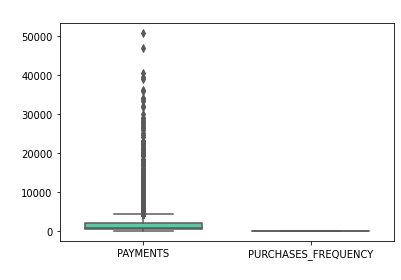

In [14]:
attributes = ['PAYMENTS', 'PURCHASES_FREQUENCY']
plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data = rfm[attributes], orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold', color='white')
plt.ylabel("Range", fontweight = 'bold', color='white')
plt.xlabel("Attributes", fontweight = 'bold', color='white')

In [15]:
q1 = rfm.PAYMENTS.quantile(0.05)
q3 = rfm.PAYMENTS.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.PAYMENTS >= q1 - 1.5 * iqr) & (rfm.PAYMENTS <= q3 + 1.5 * iqr)]

q1 = rfm.PURCHASES_FREQUENCY.quantile(0.05)
q3 = rfm.PURCHASES_FREQUENCY.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.PURCHASES_FREQUENCY >= q1 - 1.5 * iqr) & (rfm.PURCHASES_FREQUENCY <= q3 + 1.5 * iqr)]

Text(0.5, 0, 'Attributes')

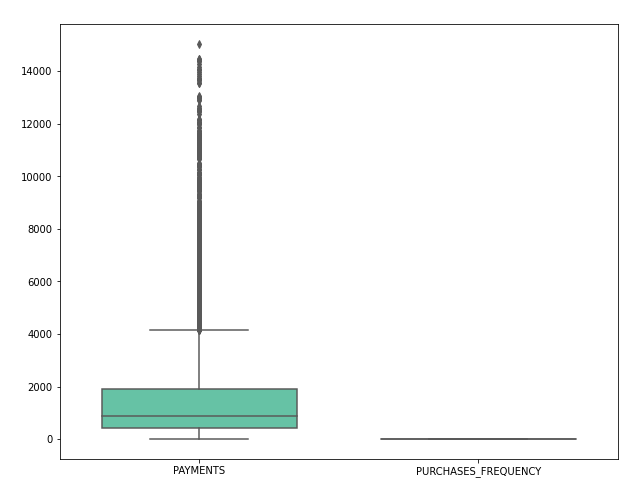

In [16]:
attributes = ['PAYMENTS', 'PURCHASES_FREQUENCY']
plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data = rfm[attributes], orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold', color='white')
plt.ylabel("Range", fontweight = 'bold', color='white')
plt.xlabel("Attributes", fontweight = 'bold', color='white')

In [17]:
rfm_sc = rfm[["PAYMENTS", "PURCHASES_FREQUENCY"]]

scaler = StandardScaler()

rfm_sc = scaler.fit_transform(rfm_sc)
rfm_sc.shape

(8564, 2)

In [18]:
rfm_sc = pd.DataFrame(rfm_sc)
rfm_sc.columns = ['PAYMENTS', 'PURCHASES_FREQUENCY']
rfm_sc.head()

,PAYMENTS,PURCHASES_FREQUENCY
0,-0.701015,-0.819067
1,1.254372,-1.234830
2,-0.490369,1.259747
3,-0.462166,-1.026950
4,-0.100422,0.428222


Text(0.5, 0, 'Attributes')

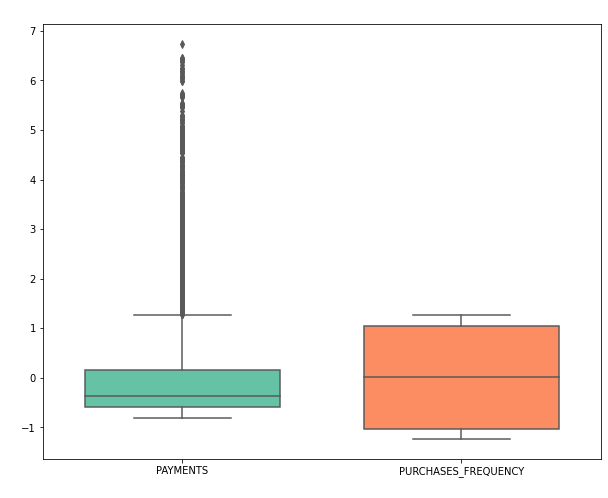

In [19]:

plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data = rfm_sc, orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold', color='white')
plt.ylabel("Range", fontweight = 'bold', color='white')
plt.xlabel("Attributes", fontweight = 'bold', color='white')

In [20]:
from scipy import stats

z = np.abs(stats.zscore(rfm_sc))
threshold = 3
rfm_sc = rfm_sc[(z < threshold).all(axis=1)]

Text(0.5, 0, 'Attributes')

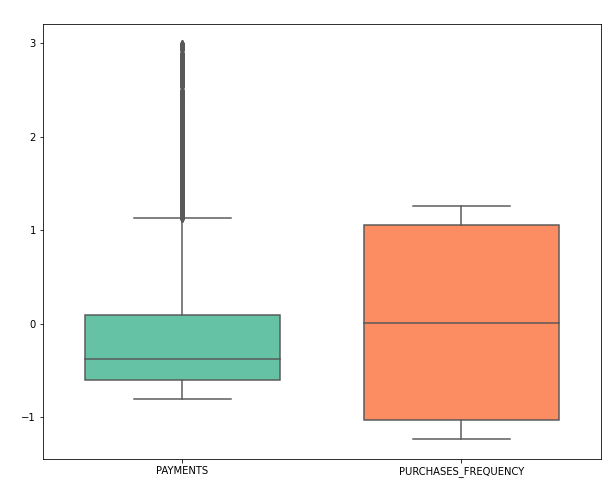

In [21]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data = rfm_sc, orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold', color='white')
plt.ylabel("Range", fontweight = 'bold', color='white')
plt.xlabel("Attributes", fontweight = 'bold', color='white')

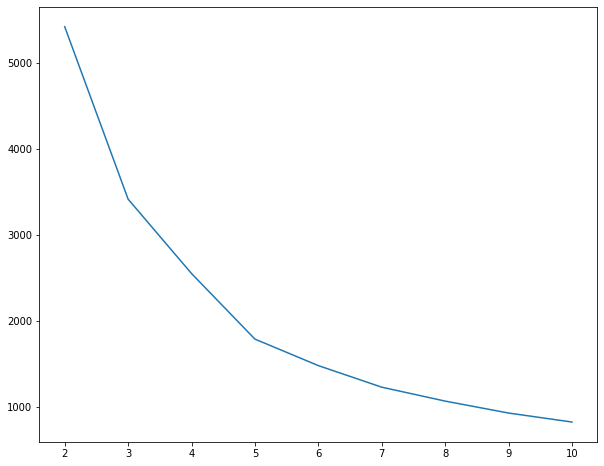

In [22]:
# SSD / ELBOW CURVE

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_sc)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(range_n_clusters, ssd)
plt.show()

In [23]:
# Silhouette analysis

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_sc)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_sc, cluster_labels)
    
    print('For n_clusters={0}, the silhouette score is {1}'.format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5370748680717365
For n_clusters=3, the silhouette score is 0.5576358861331825
For n_clusters=4, the silhouette score is 0.5328654788240219
For n_clusters=5, the silhouette score is 0.5122102990197178
For n_clusters=6, the silhouette score is 0.49474302651526403
For n_clusters=7, the silhouette score is 0.48013391513124076
For n_clusters=8, the silhouette score is 0.463115660918714
For n_clusters=9, the silhouette score is 0.46476105919700755
For n_clusters=10, the silhouette score is 0.4605117299929374


In [24]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfm_sc)

KMeans(max_iter=50, n_clusters=5)

In [25]:
kmeans.labels_

array([0, 4, 3, ..., 3, 0, 2], dtype=int32)

In [27]:
rfm_sc['Cluster_ID'] = kmeans.labels_
rfm_sc.head()

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PAYMENTS,PURCHASES_FREQUENCY,Cluster_ID
0,-0.701015,-0.819067,0
1,1.254372,-1.234830,4
2,-0.490369,1.259747,3
3,-0.462166,-1.026950,0
4,-0.100422,0.428222,2


<AxesSubplot:xlabel='Cluster_ID', ylabel='PAYMENTS'>

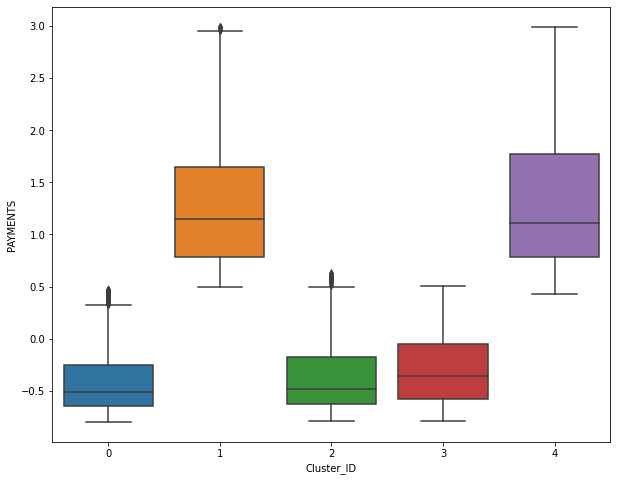

In [28]:
sns.boxplot(x='Cluster_ID', y='PAYMENTS', data=rfm_sc)

<AxesSubplot:xlabel='Cluster_ID', ylabel='PURCHASES_FREQUENCY'>

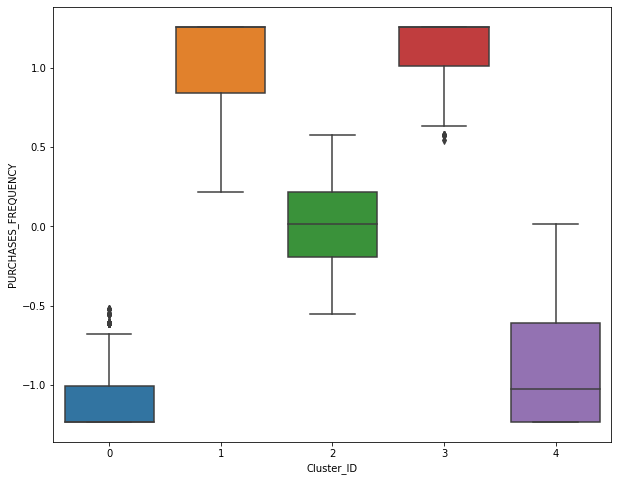

In [29]:
sns.boxplot(x='Cluster_ID', y='PURCHASES_FREQUENCY', data=rfm_sc)

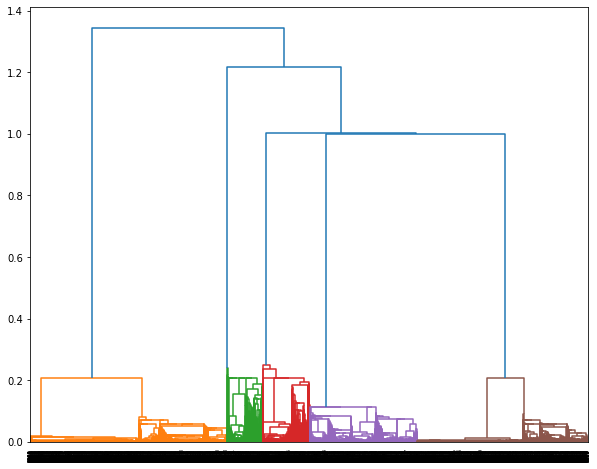

In [30]:
# Single Linkage

mergings_s = linkage(rfm_sc, method='single', metric='euclidean')
dendrogram(mergings_s)
plt.show()

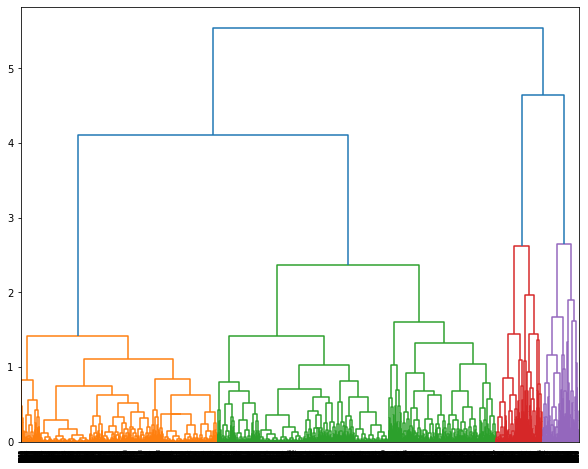

In [31]:
# Complete Linkage

mergings_c = linkage(rfm_sc, method='complete', metric='euclidean')
dendrogram(mergings_c)
plt.show()

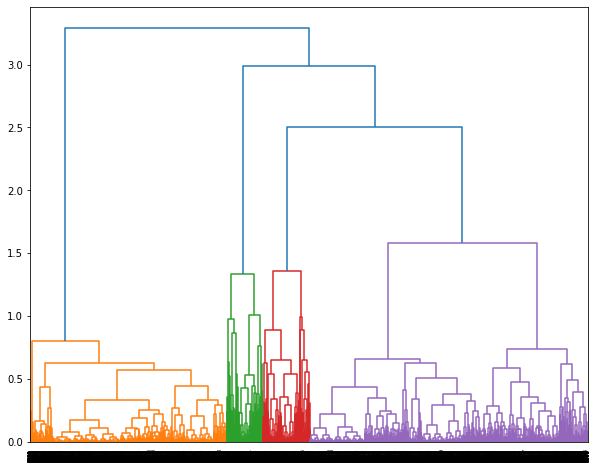

In [32]:
# Average Linkage

mergings_a = linkage(rfm_sc, method='average', metric='euclidean')
dendrogram(mergings_a)
plt.show()

In [34]:
cluster_labels = cut_tree(mergings_c, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [36]:
rfm_sc['Cluster_Labels'] = cluster_labels
rfm_sc.head(20)

,PAYMENTS,PURCHASES_FREQUENCY,Cluster_ID,Cluster_Labels
0,-0.701015,-0.819067,0,0
1,1.254372,-1.234830,4,1
2,-0.490369,1.259747,3,0
3,-0.462166,-1.026950,0,0
4,-0.100422,0.428222,2,0
5,2.382766,1.259747,1,2
6,-0.461800,1.259747,3,0
7,-0.457182,-0.403305,2,0
8,-0.218353,-0.819067,0,0
9,-0.259187,1.259747,3,0
